# **CAR PRICE PREDICTION WITH MACHINE LEARNING**
# *By intern SREEVISWANATH.J*


## **Load the dataset**

In [1]:
import pandas as pd

file_path = '/home/car data.csv'
car_data = pd.read_csv(file_path)


## **Preview the dataset**

In [2]:
print("The data is:\n")
car_data

The data is:



,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## **Columns in the data set**

In [3]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## **Print first and last values of dataset**

In [4]:
print("The first Five values of the data set :\n")
car_data.head()

The first Five values of the data set :



,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print("The Last Five values of the data set :\n")
car_data.tail()

The Last Five values of the data set :



,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


## **Checking for null values**

In [6]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


## **Statistics about the data**

In [7]:
print("The Statistics of the data:\n")
car_data.describe()

The Statistics of the data:



,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **Exploratory Data Analysis (EDA) with Visualizations**

## **Distribution of Selling Price**

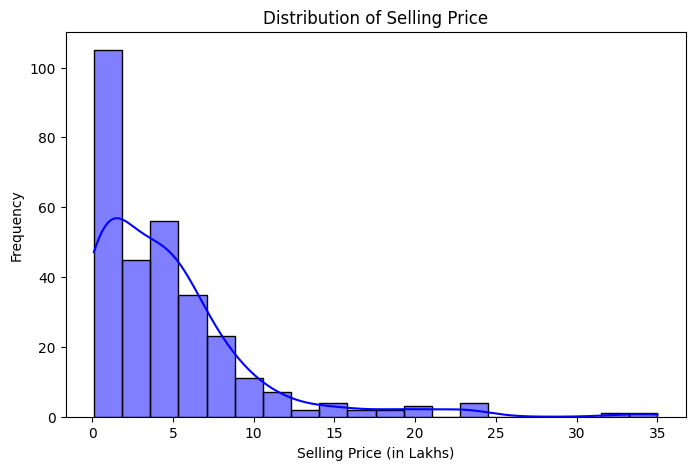

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(car_data['Selling_Price'], kde=True, bins=20, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in Lakhs)")
plt.ylabel("Frequency")
plt.show()

## **Count of Cars by Fuel Type**

<ipython-input-9-d7d37dba0c3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_data, x='Fuel_Type', palette='pastel')


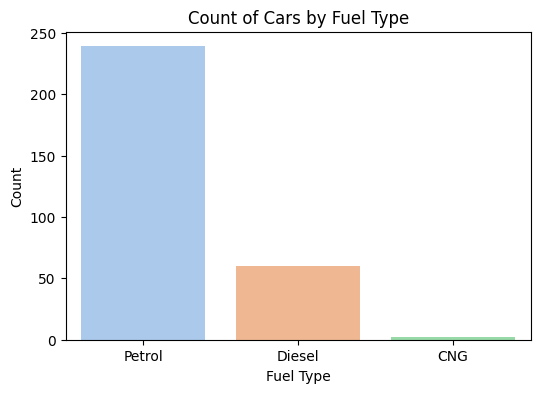

In [9]:
# Plot the count of Fuel Types
plt.figure(figsize=(6, 4))
sns.countplot(data=car_data, x='Fuel_Type', palette='pastel')
plt.title("Count of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

## **Present Price vs. Selling Price**

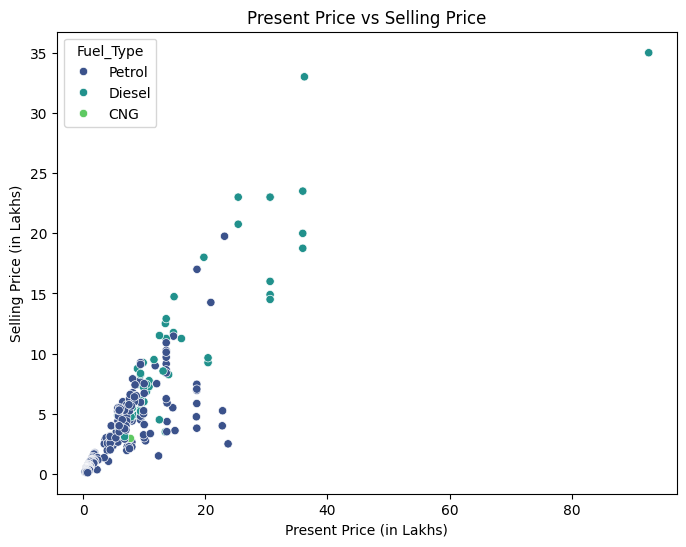

In [10]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data, x='Present_Price', y='Selling_Price', hue='Fuel_Type', palette='viridis')
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price (in Lakhs)")
plt.ylabel("Selling Price (in Lakhs)")
plt.show()

## **Feature Engineering**

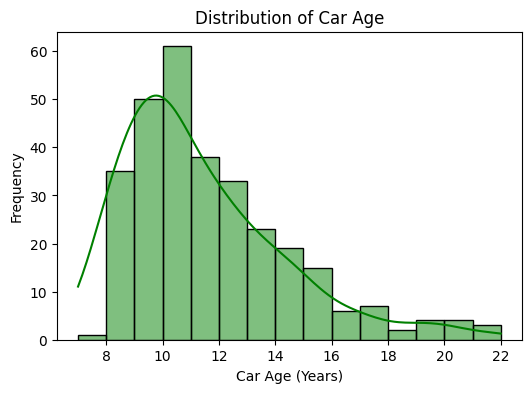

In [11]:
import datetime

# Add a new feature for car age
current_year = datetime.datetime.now().year
car_data['Car_Age'] = current_year - car_data['Year']

# Drop unnecessary columns
processed_data = car_data.drop(['Year', 'Car_Name'], axis=1)

# Plot distribution of Car Age
plt.figure(figsize=(6, 4))
sns.histplot(processed_data['Car_Age'], kde=True, bins=15, color='green')
plt.title("Distribution of Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Frequency")
plt.show()


## **Encoding Categorical Variables**

In [12]:
# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(processed_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

## **Correlation Analysis**

In [13]:
# Compute correlation matrix
car_data.corr(numeric_only = True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104,-1.000000
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344,-0.236141
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058,0.047192
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216,0.524342
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000,0.182104
Car_Age,-1.000000,-0.236141,0.047192,0.524342,0.182104,1.000000


## **Correlation Heatmap**

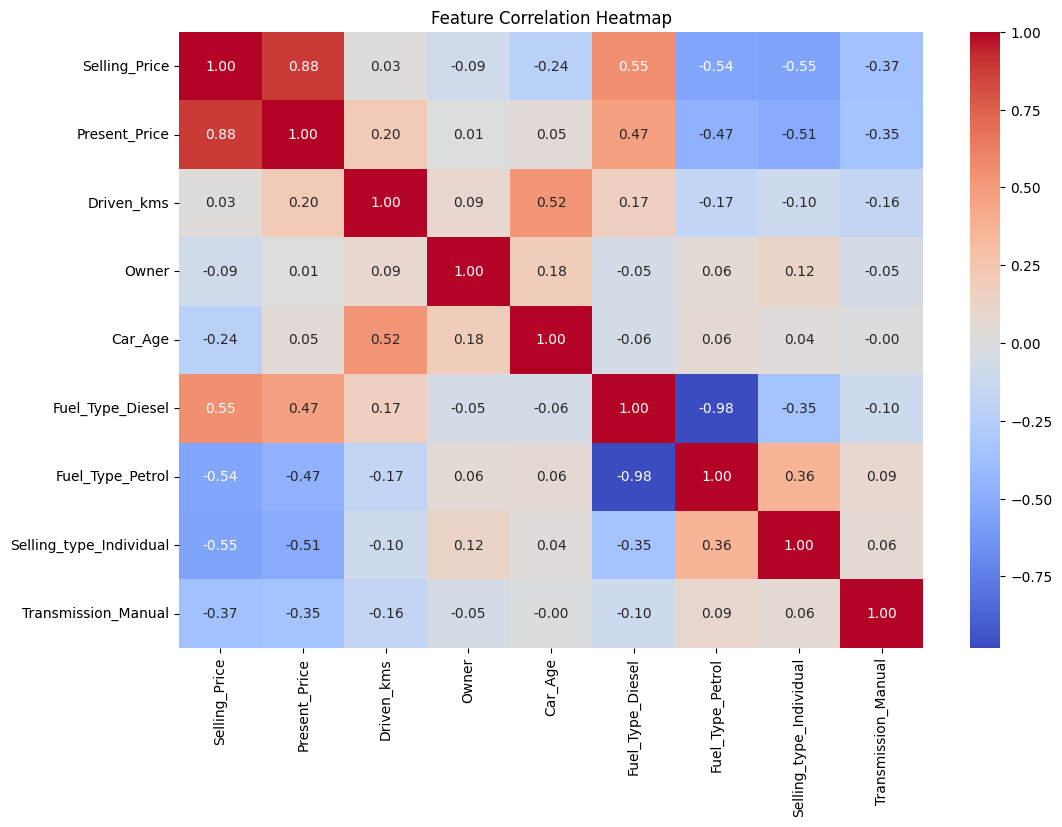

In [14]:
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## **Data Splitting for Training and Testing**

In [15]:
from sklearn.model_selection import train_test_split

# Define features and target
X = encoded_data.drop('Selling_Price', axis=1)
y = encoded_data['Selling_Price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Training and Prediction with Evaluation**

Mean Squared Error: 0.9442812640983598
R-squared Score: 0.959007714205532


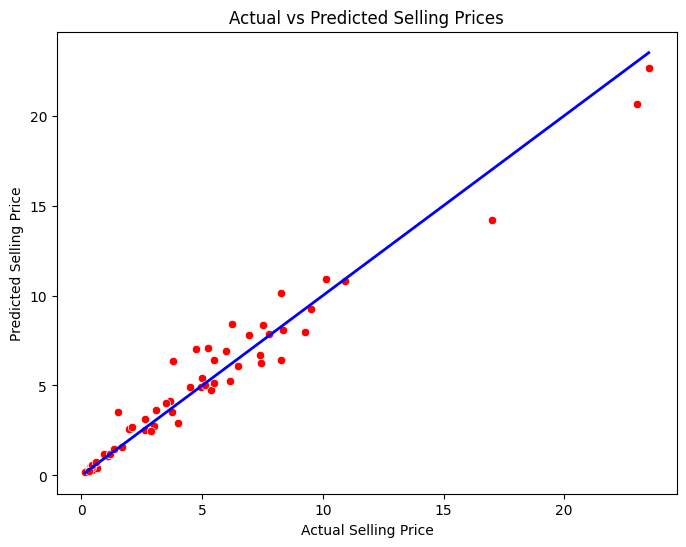

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Visualization of Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', lw=2)
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.show()
